# Sequential Model for Fashion Mnist Dataset

In [1]:

import streamlit as st
import matplotlib.pyplot as plt
from PIL import Image
import io
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
#########
#@ st.cache
fas_data=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fas_data.load_data()


############################## Class naming  #####################
class_names=['Tshit/TOP','Trouser','Pullover','Dress','Coat',
             'Sandel','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
import numpy as np
def explore_data(train_images,train_label,test_images):
    st.write('Train Images shape:',train_images.shape)
    st.write('Test images shape:',test_images.shape)
    #st.write(train_labels[0:20])
    st.write('Training Classes',len(np.unique(train_labels)))
    st.write('Testing Classes',len(np.unique(test_labels)))
if st.button("Explore Data"):
    explore_data(train_images,train_labels,test_images)
    
    

In [5]:
# Data preprocessing
# input [0-255] require scaling in [0-1]
train_images=train_images/255.0
test_images=test_images/255.0
# target
train_l=keras.utils.to_categorical(train_labels,10) # 10 class
test_l=keras.utils.to_categorical(test_labels,10)

train_image=np.expand_dims(train_images,3)
test_image=np.expand_dims(test_images,3)
print(train_images.shape)
print(test_images.shape)
print(train_image.shape)
print(test_image.shape)
print(train_l.shape)



(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)


In [7]:
############# Select model 
model=keras.Sequential()
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #28 x 28=784 x 1
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation='softmax'))


In [8]:
#########3 model compilation ##### for sequential model
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])
hist=model.fit(train_images,train_l,epochs=10,verbose=1,validation_split=0.2)
    

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 367us/sample - loss: 0.6149 - accuracy: 0.7860 - val_loss: 0.4255 - val_accuracy: 0.8443
Epoch 2/10
48000/48000 [==============================] - 13s 263us/sample - loss: 0.4217 - accuracy: 0.8490 - val_loss: 0.3777 - val_accuracy: 0.8635
Epoch 3/10
48000/48000 [==============================] - 13s 263us/sample - loss: 0.3785 - accuracy: 0.8648 - val_loss: 0.3938 - val_accuracy: 0.8510
Epoch 4/10
48000/48000 [==============================] - 13s 265us/sample - loss: 0.3542 - accuracy: 0.8728 - val_loss: 0.3651 - val_accuracy: 0.8653
Epoch 5/10
48000/48000 [==============================] - 13s 275us/sample - loss: 0.3311 - accuracy: 0.8794 - val_loss: 0.3425 - val_accuracy: 0.8755
Epoch 6/10
48000/48000 [==============================] - 13s 263us/sample - loss: 0.3184 - accuracy: 0.8829 - val_loss: 0.3451 - val_accuracy: 0.8741
Epoch 7/10
48000/48000 [====================

In [9]:
##
model.summary()
test_loss,test_acc=model.evaluate(test_images,test_l)
print(test_acc)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

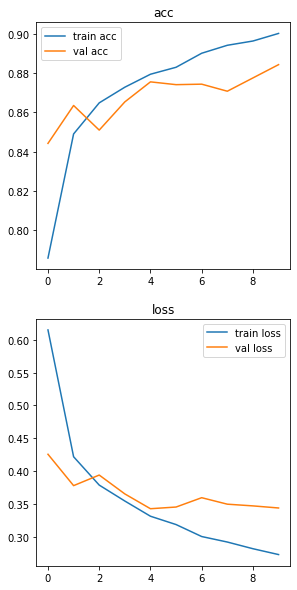

In [10]:
def history_graph():
    plt.figure(figsize=(10,10))
    train_acc=hist.history['accuracy']
    val_acc=hist.history['val_accuracy']
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    plt.subplot(2,2,1)
    plt.plot(train_acc,label='train acc')
    plt.plot(val_acc,label='val acc')
    plt.legend()
    plt.title('acc')
    plt.subplot(2,2,3)
    plt.plot(train_loss,label='train loss')
    plt.plot(val_loss,label='val loss')
    plt.legend()
    plt.title('loss')
history_graph()

In [11]:
import pickle
with open('seq_trainHistory', 'wb') as file_pi:
        pickle.dump(hist.history, file_pi)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
model.save('Seq_model')

2020-11-02 10:44:18.703 WARNING tensorflow: From C:\Users\Sandeep\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-11-02 10:44:21.601 INFO    tensorflow: Assets written to: Seq_model\assets
